In [1]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
import gym
import w_mac
# import w_mac_tune
from collections import defaultdict
import matplotlib as plt
import networkx as nx

# # data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
# #data = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),(4,10),(5,6),(6,7),(6,8),(7,8),(8,9),(9,10)]
# d = defaultdict(list)
# data = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# # defaultdict(<type 'list'>, {})
# for node, dest in data:
#     d[node].append(dest)
# print(d)

# G = nx.Graph()
# for k,v in d.items():
#     for vv in v:
#         G.add_edge(k,vv)
# nx.draw(G)

defaultdict(<class 'list'>, {0: [1, 2, 3], 1: [2, 3], 2: [3, 4], 3: [4], 5: [2, 3, 4]})
self.collision_domain {5: [0, 1, 2, 3], 8: [2, 3, 4, 5]}
self.node_in_domains :  {0: [5], 1: [5], 2: [5, 8], 3: [5, 8], 4: [8], 5: [8]}
self.attack_nodes [1]
self.node_action_list {0: [0, 1, 2, 3], 1: [0, 1, 2, 3], 2: [0, 1, 2, 3, 4, 5], 3: [0, 1, 2, 3, 4, 5], 4: [2, 3, 4, 5], 5: [2, 3, 4, 5]}
sorted self.node_action_list {0: [0, 1, 2, 3], 1: [0, 1, 2, 3], 2: [0, 1, 2, 3, 4, 5], 3: [0, 1, 2, 3, 4, 5], 4: [2, 3, 4, 5], 5: [2, 3, 4, 5]}
action_space MultiDiscrete([4 4 6 6 4 4])
MultiDiscrete([7 7 7 7 7 7 6])
[6 0 2 2 0 3 0]
------------------ resetting environment--------------------
self.attack_nodes [4]
[5, 2, 3, 0, 6, 2, 4]


array([5, 2, 3, 0, 6, 2, 4])

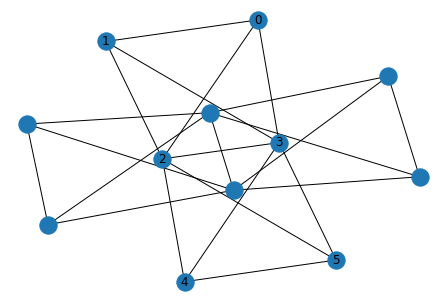

In [3]:
env = gym.make('wmac-tune-v0')
env.reset()

In [4]:
check_env(env)

------------------ resetting environment--------------------
self.attack_nodes [4]
[2, 0, 0, 1, 6, 3, 4]
Packet lost due to passing to defect node 5 index 5 [3, 0, 0, 2, 6, 4] [1, 1, 1, 1, 0, 1]
Packet lost due to passing to defect node 5 index 5 [2, 2, 3, 6, 6, 4] [1, 1, 1, 0, 0, 1]
Packet lost due to passing to defect node 5 index 5 [6, 6, 0, 5, 6, 4] [0, 0, 1, 1, 0, 1]
Packet lost due to passing to defect node 5 index 5 [6, 2, 6, 0, 6, 4] [0, 1, 0, 1, 0, 1]
packets delivered  0
packet_lost  25
------------------ resetting environment--------------------
self.attack_nodes [3]
[2, 5, 1, 6, 2, 4, 3]
Packet lost due to passing to defect node 1 index 1 [6, 3, 1, 6, 5, 2] [0, 1, 1, 0, 1, 1]
Packet lost due to passing to defect node 0 index 0 [3, 2, 0, 6, 5, 3] [1, 1, 1, 0, 1, 1]
Packet lost due to passing to defect node 5 index 5 [3, 2, 0, 6, 5, 3] [1, 1, 1, 0, 1, 1]
Packet lost due to passing to defect node 4 index 4 [1, 2, 4, 6, 3, 2] [1, 1, 1, 0, 1, 1]
Packet lost due to passing to def

In [ ]:
model = A2C(MlpPolicy, env, verbose=1,tensorboard_log="./a2c_tensorboard/")
model.learn(total_timesteps=100)
model.save("a2c_wmac")

In [ ]:
del model # remove to demonstrate saving and loading

In [ ]:
model = A2C.load("a2c_wmac")

obs = env.reset()
count = 0
while count < 100:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    count = count + 1
    print("count :", count)
    if done:
        break
    
    #env.render()